# Tarea 1

### Carga de Librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os #Libreria para verificar los archivos que estan en la carpeta
import missingno as msno

In [3]:
os.listdir()

['.git',
 'bank_marketing (1).csv',
 'bank_marketing (3).xlsx',
 'Tarea Mag 25_2.pdf',
 'Tarea1.ipynb']

### Carga de datos

In [4]:
data = pd.read_csv("bank_marketing (1).csv")
data.head(5) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Revision de valores faltantes

<Axes: >

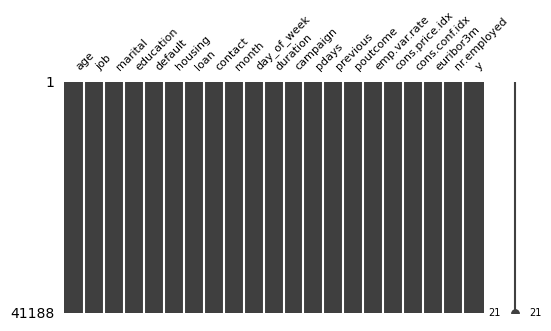

In [5]:
msno.matrix(data, figsize=(6,3), fontsize=8) # No tiene nulos

<Axes: >

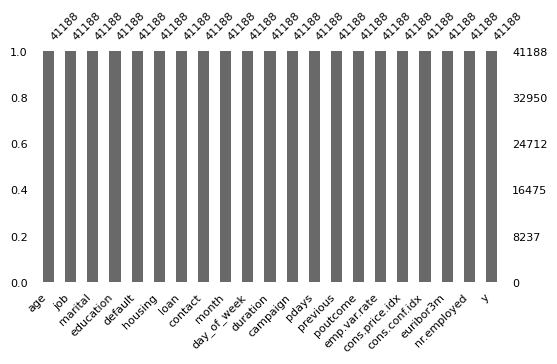

In [6]:
msno.bar(data, figsize=(6, 3), fontsize = 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Pregunta 1

In [8]:
#Codigo que divide variables cuantitativas y qualitativas para poder graficar
var_quantitative = [col for col in data.columns if data[col].dtype in ("int64", "float64")]
var_qualitative = [col for col in data.columns if col not in var_quantitative and col != "y"]

In [9]:
print(len(var_quantitative))
print(len(var_qualitative))

10
10


In [10]:
data["y"].value_counts() #Hay clara diferencia de proporcion

y
no     36548
yes     4640
Name: count, dtype: int64

#### Variables Cualitativas

In [11]:
def graficar_variable_cuanatitativa_countplot(lista):
    columnas = 4
    filas = 3

    fig, axes = plt.subplots(filas, columnas, figsize = (15,10))
    axes= axes.flatten()

    for i, col in enumerate(lista):
        sns.countplot(data, x = col, hue = "y", ax = axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].set_title(f"{col} vs Var. objetivo")
        axes[i].tick_params(axis = "x", rotation = 45, labelsize = 8)
        axes[i].legend(title = "Var. Objetivo", fontsize = 7, title_fontsize = 8)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    


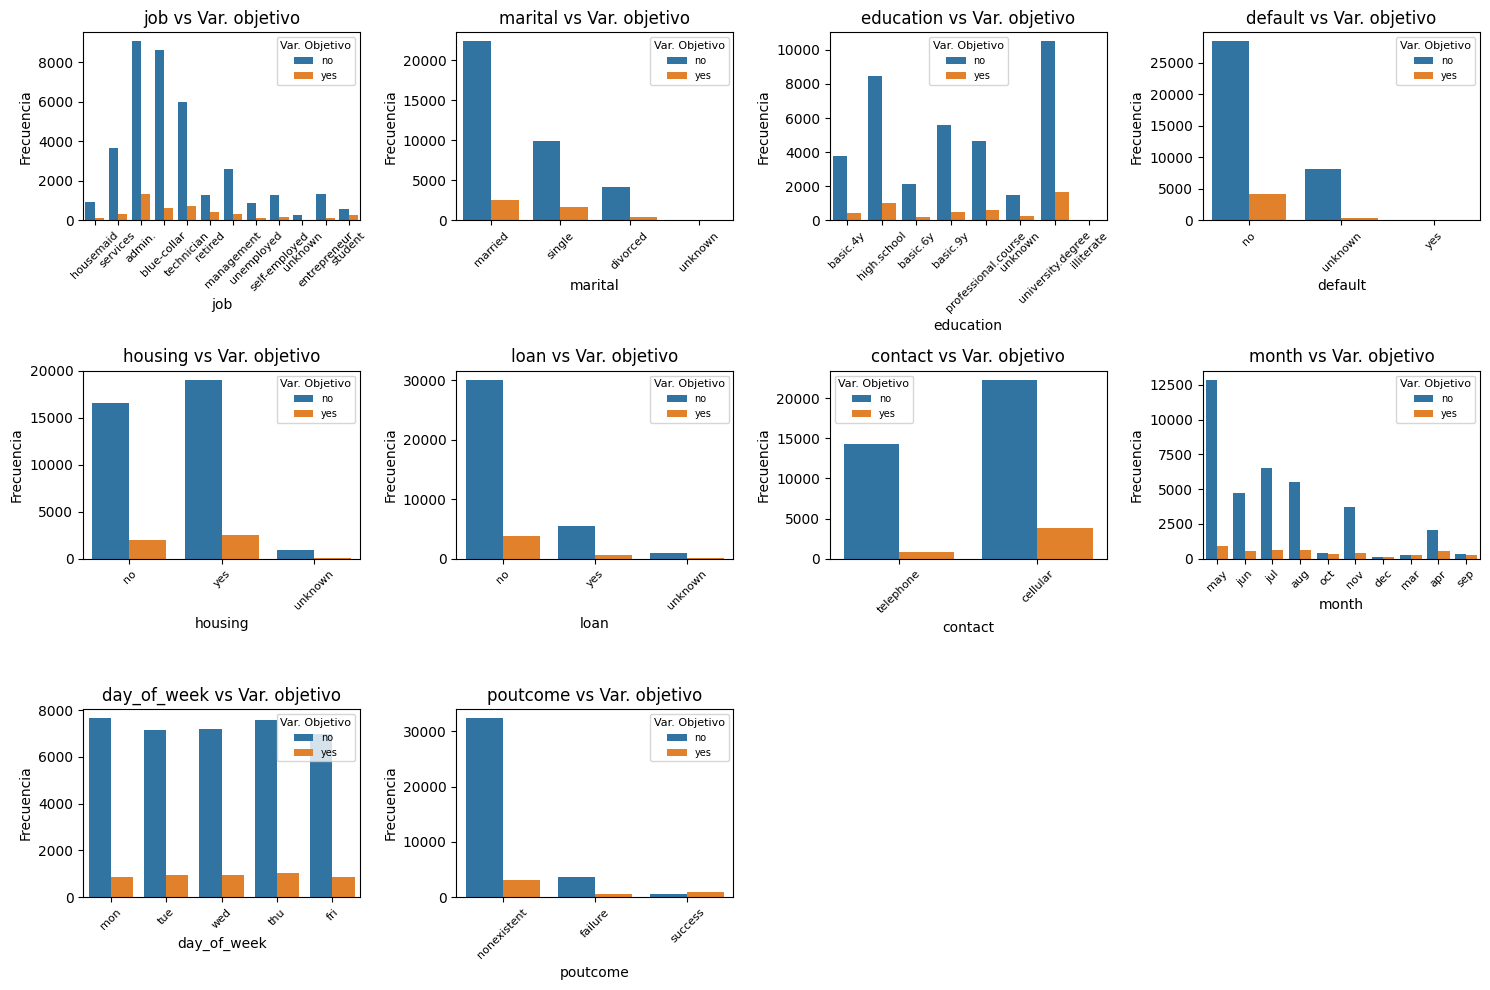

In [12]:
graficar_variable_cuanatitativa_countplot(var_qualitative)

In [13]:
#proporciones = pd.crosstab(data["poutcome"], data["y"], normalize = "index")

def graficar_variable_cuanatitativa_crosstab(lista):

    columnas = 4
    filas = 3

    fig, axes = plt.subplots(filas,columnas , figsize= (15,10))
    axes = axes.flatten()

    for i, col in enumerate(lista):
        proporciones = pd.crosstab(data[col], data["y"], normalize = "index")
        proporciones.plot(kind = "bar", ax = axes[i], stacked = True)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].set_title(f"{col} vs Var. objetivo")
        axes[i].tick_params(axis = "x", rotation = 45, labelsize = 8)
        axes[i].legend(title = "Var. Objetivo", fontsize = 7, title_fontsize = 8)
        if i == 0:
            axes[i].axhline(y=0.6, color='red', linestyle='--')
            axes[i].axhline(y=0.8, color='red', linestyle='--')
        elif i == 7:
            axes[i].axhline(y=0.4, color='red', linestyle='--')
            axes[i].axhline(y=0.65, color='red', linestyle='--')

        elif i == 9:
            axes[i].axhline(y=0.2, color='red', linestyle='--')
            axes[i].axhline(y=0.5, color='red', linestyle='--')
        
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
        



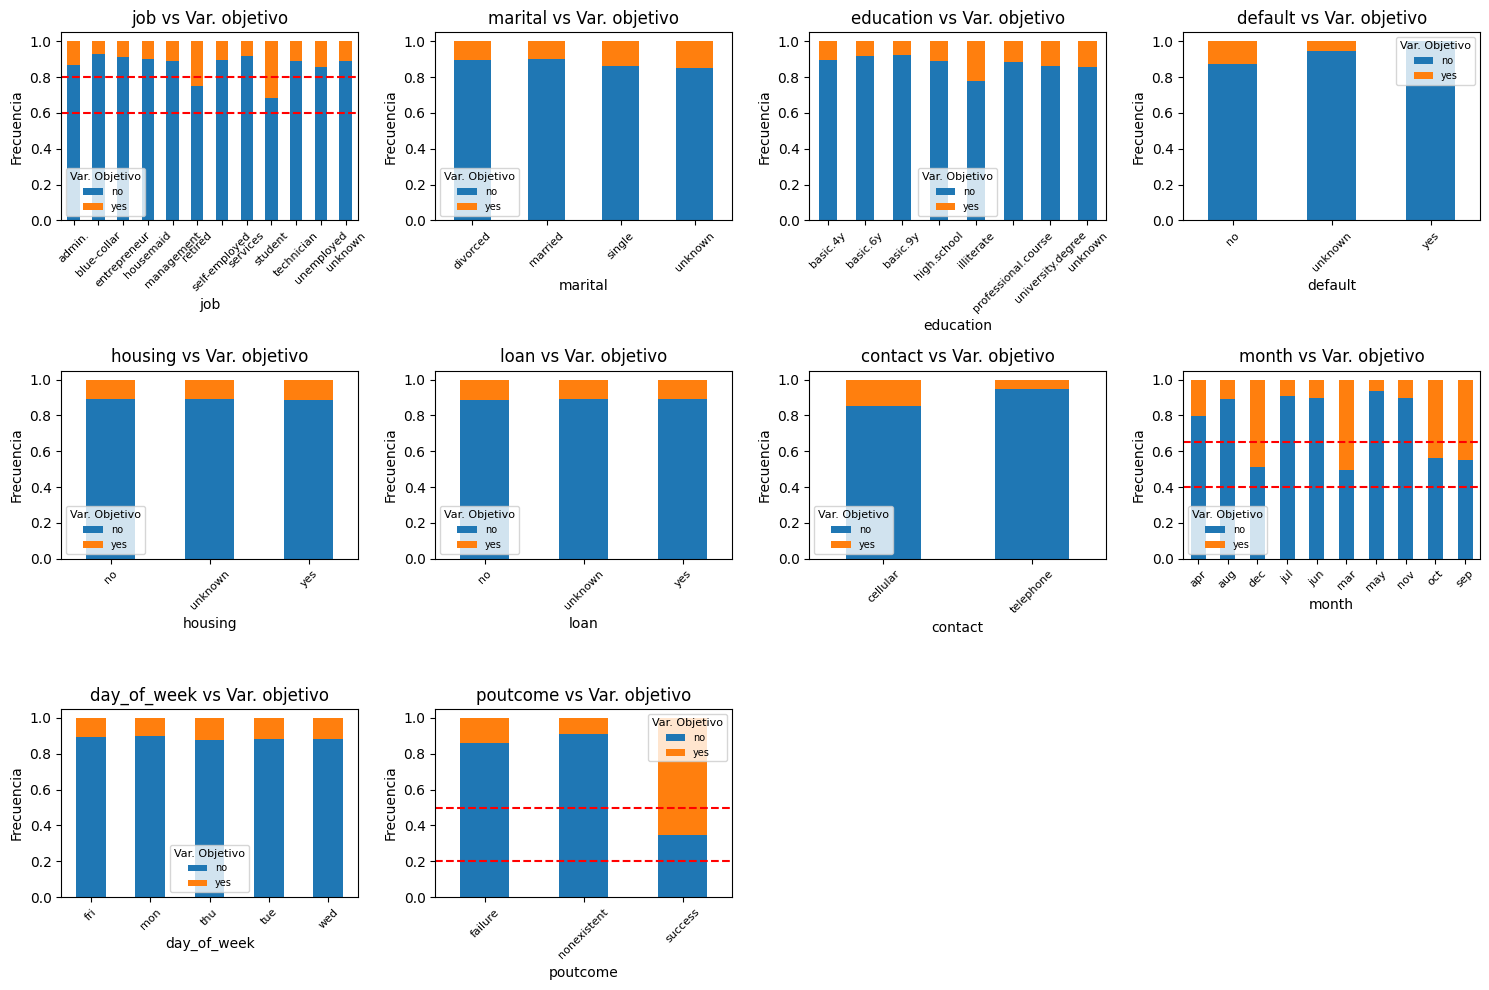

In [14]:
graficar_variable_cuanatitativa_crosstab(var_qualitative)

#### Variables Continuas

In [15]:
def graficar_hitogramas_objetivo(lista):
    filas = 3
    columnas = 4

    fig, axes = plt.subplots(filas, columnas, figsize = (15,10))
    axes = axes.flatten()
    

    for i, col in enumerate(lista):
        sns.histplot(data = data,x= col, ax=axes[i], hue = "y", bins = 25)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].set_title(f"{col} vs Var. objetivo")

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()

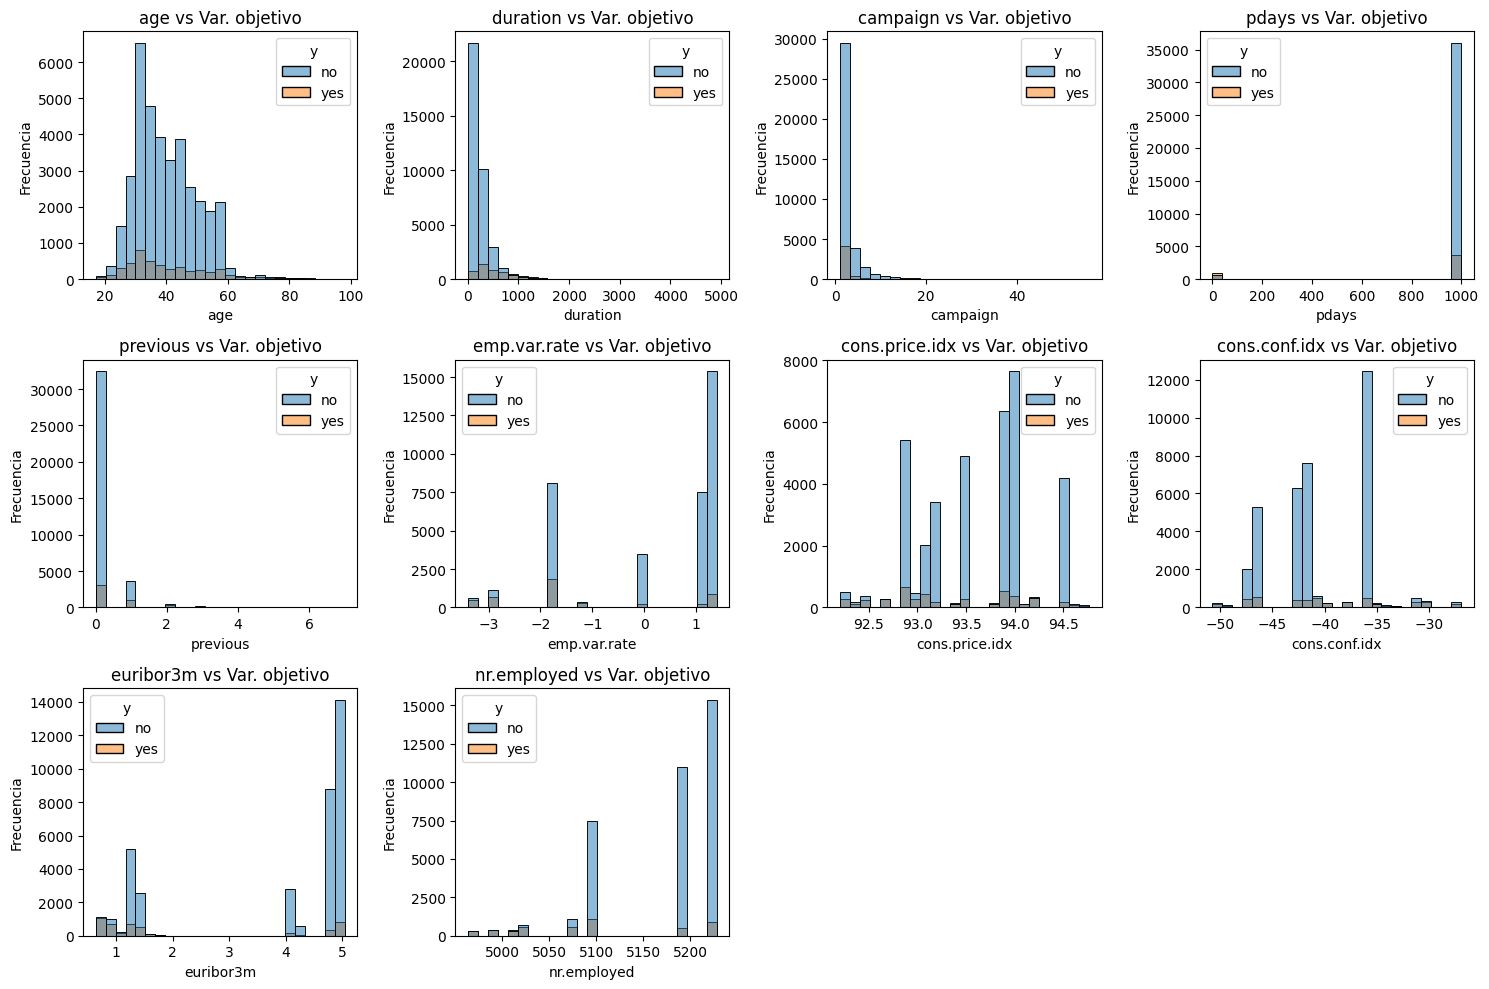

In [16]:
graficar_hitogramas_objetivo(var_quantitative)

In [17]:
def graficar_hitogramas(lista):
    filas = 3
    columnas = 4

    fig, axes = plt.subplots(filas, columnas, figsize = (15,10))
    axes = axes.flatten()
    

    for i, col in enumerate(lista):
        sns.histplot(data = data,x= col, ax=axes[i], bins = 25)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].set_title(f"{col} vs Var. objetivo")

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()

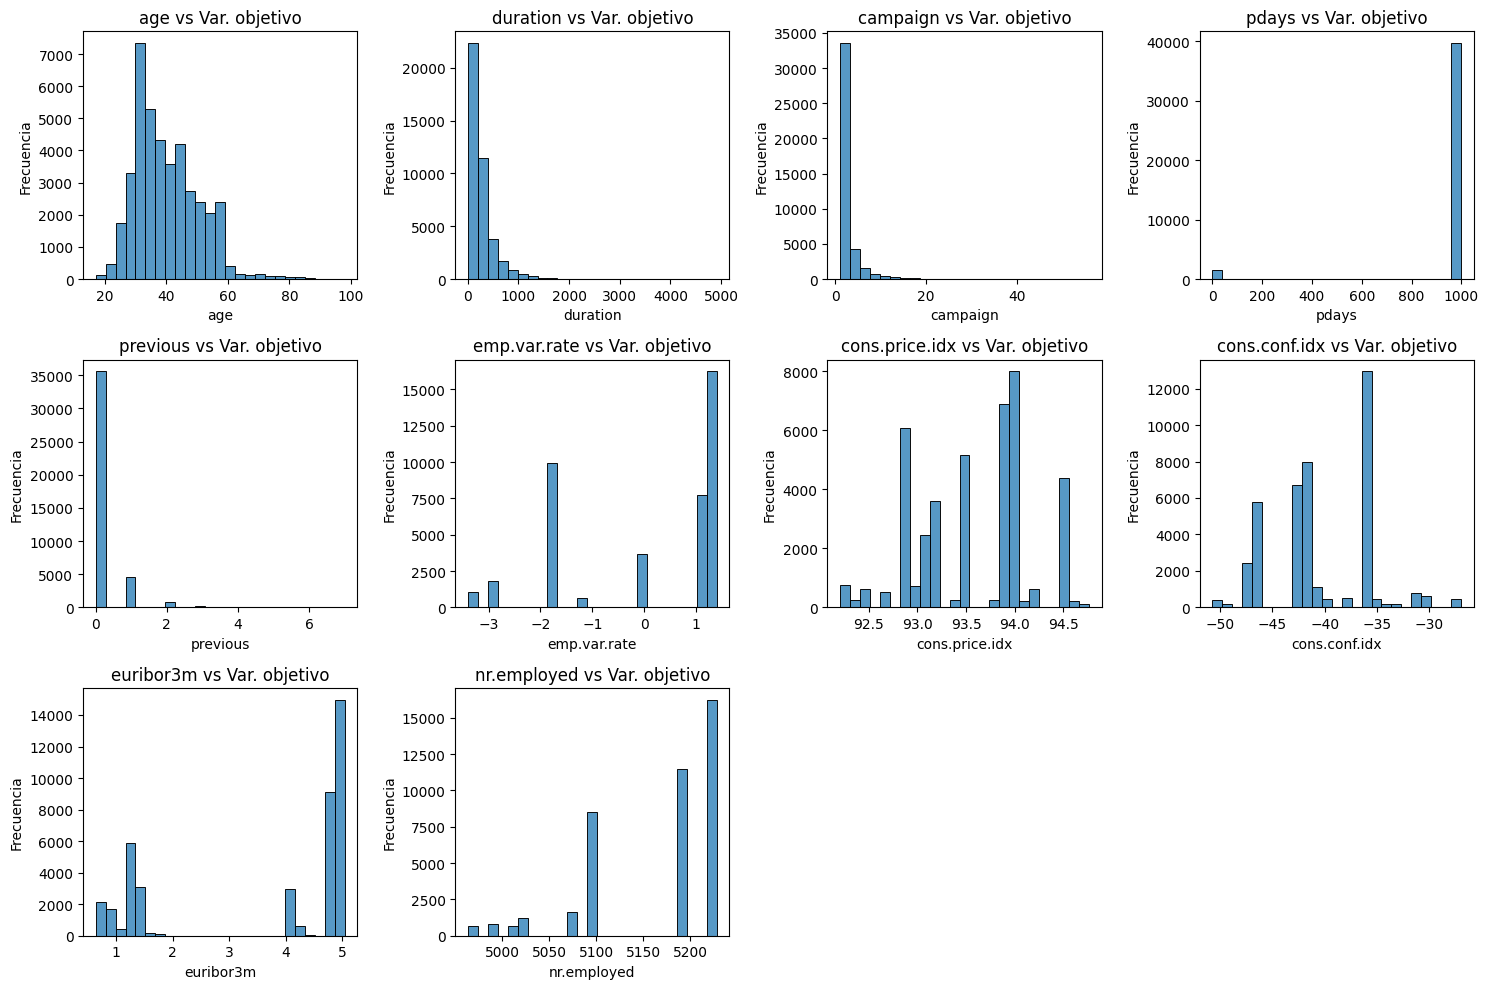

In [18]:
graficar_hitogramas(var_quantitative)

### Pregunta 2: Distribucion de variable objetivo por tipo de trabajo

In [19]:
pd.crosstab(data["job"], data["y"], normalize = "index")

y,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


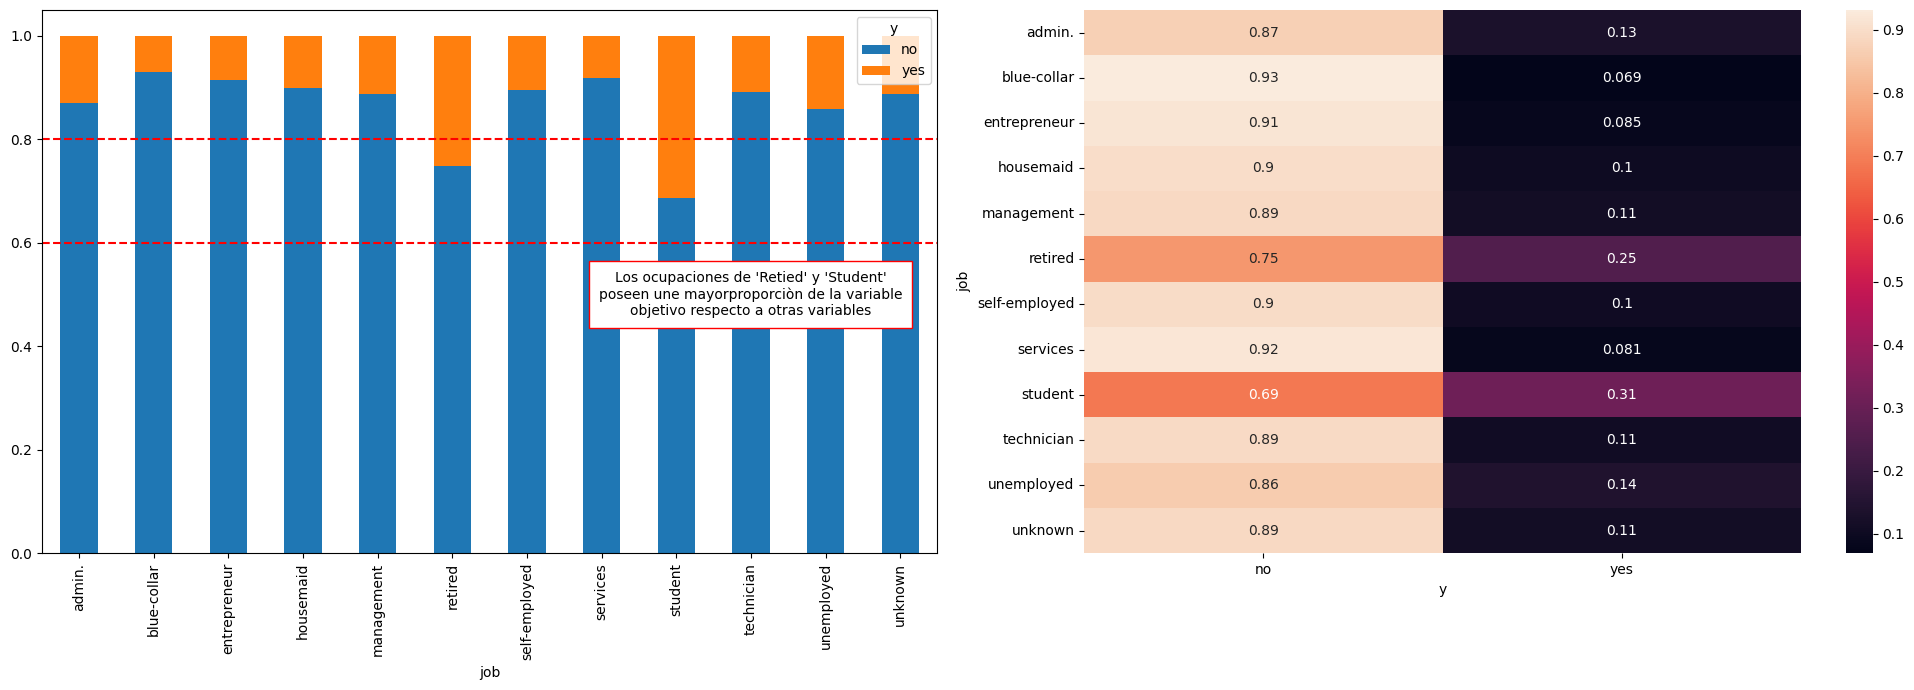

In [20]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
tabla_proporciones = pd.crosstab(data["job"], data["y"], normalize = "index")
axes[0].axhline(y=0.6, color='red', linestyle='--')
axes[0].axhline(y=0.8, color='red', linestyle='--')
axes[0].text(
    x = 9, y = 0.5,
    s = """Los ocupaciones de 'Retied' y 'Student'\nposeen une mayorproporciòn de la variable\nobjetivo respecto a otras variables""",
    fontsize = 10, color = "black",
    ha = "center", va = "center",
    bbox = {"edgecolor" : "red",
            "facecolor": "white",
            "boxstyle" : "square, pad = 0.7"
            } 


)
tabla_proporciones.plot(kind = "bar", ax = axes[0], stacked = True)
sns.heatmap(tabla_proporciones, ax = axes[1], annot = True)
plt.tight_layout()


### Pregunta 3

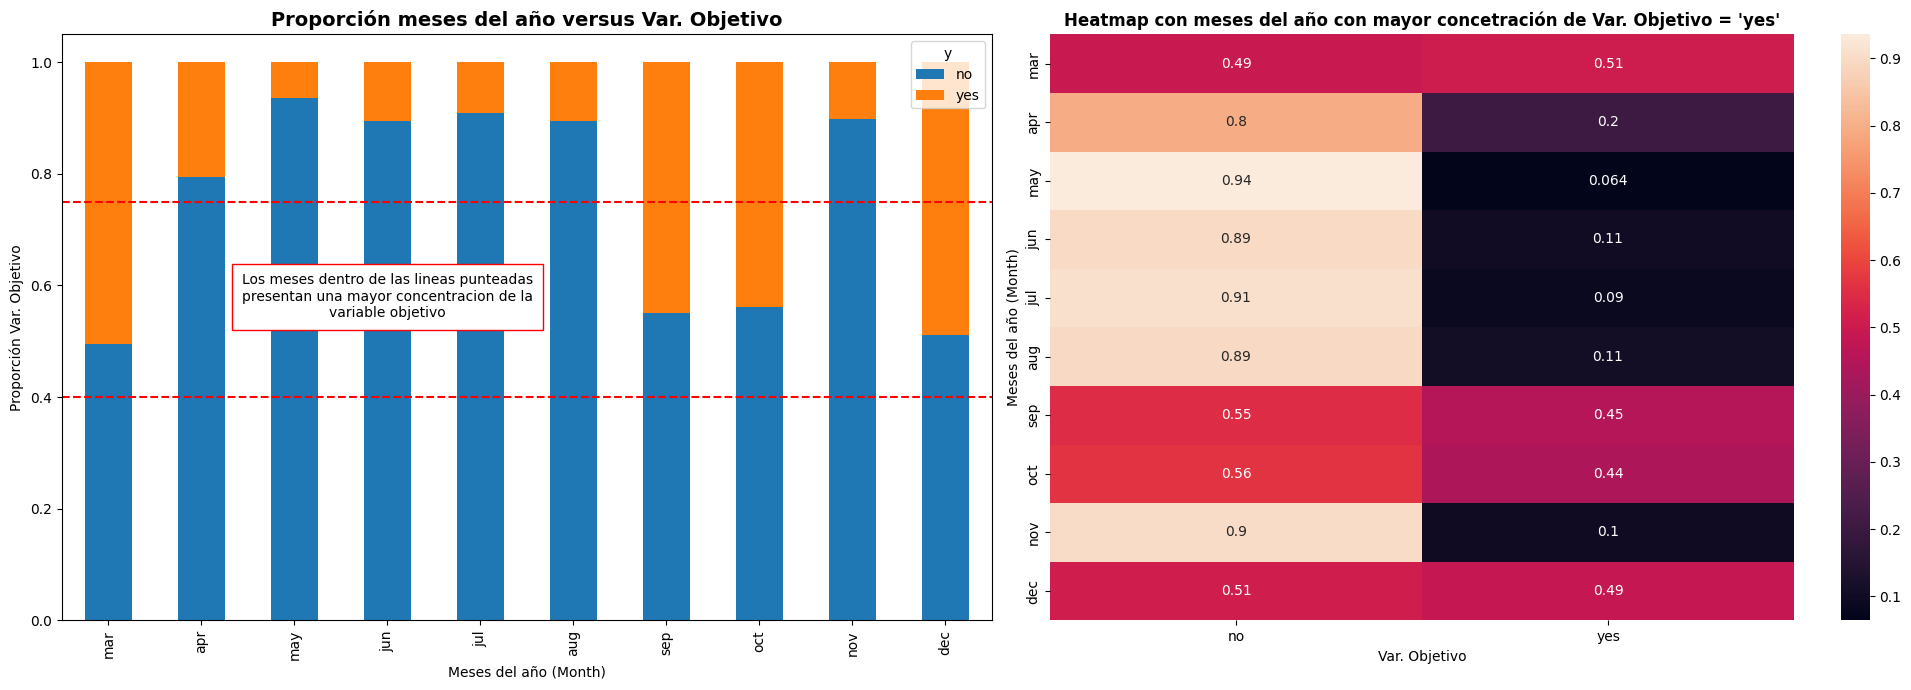

In [119]:
orden_month = ["jan", "feb", "mar", "apr", "may", "jun","jul", "aug", "sep", "oct", "nov", "dec"]
data["month"] = pd.Categorical(data["month"], categories = orden_month, ordered = True )

fig, axes = plt.subplots(1,2, figsize = (20,7))
tabla_proporciones = pd.crosstab(data["month"], data["y"], normalize = "index")
tabla_proporciones.plot(kind = "bar", ax = axes[0], stacked = True )
axes[0].set_title("Proporción meses del año versus Var. Objetivo", fontsize = 14, fontweight = "bold")
axes[0].set_ylabel("Proporción Var. Objetivo")
axes[0].set_xlabel("Meses del año (Month)")
axes[0].axhline(y=0.75, color='red', linestyle='--')
axes[0].axhline(y=0.4, color='red', linestyle='--')
axes[0].text(
    x= 3, y = 0.58,
    s = """Los meses dentro de las lineas punteadas\npresentan una mayor concentracion de la\nvariable objetivo""",
    ha="center", va = "center",
    bbox = {"facecolor": "white",
            "edgecolor": "red",
            "boxstyle": "square, pad = 0.7"}


)

sns.heatmap(tabla_proporciones, ax = axes[1], annot = True)
axes[1]. set_title("Heatmap con meses del año con mayor concetración de Var. Objetivo = 'yes'", fontweight="bold")
axes[1].set_xlabel("Var. Objetivo")
axes[1].set_ylabel("Meses del año (Month)")
plt.tight_layout()


### Pregunta 4

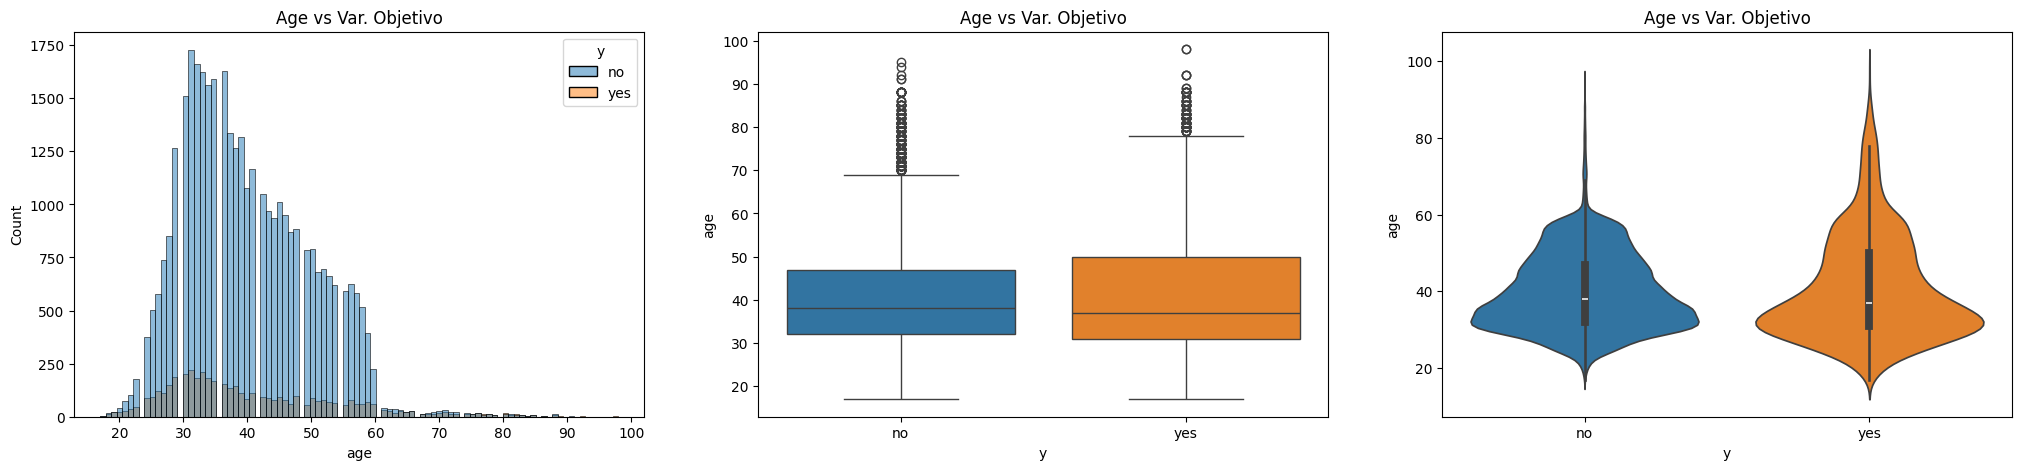

In [22]:
fig, axes = plt.subplots (1,3, figsize = (25,5))

sns.histplot(data, x = "age", hue = "y", ax = axes[0])
sns.boxplot(data, x = "y", y = "age", hue = "y", ax = axes[1])
sns.violinplot(data, x = "y", y = "age", hue = "y", ax = axes[2])
for i in range(3):
    axes[i].set_title("Age vs Var. Objetivo")

Text(0.5, 1.0, "Age vs Var. Objetivo = 'yes'")

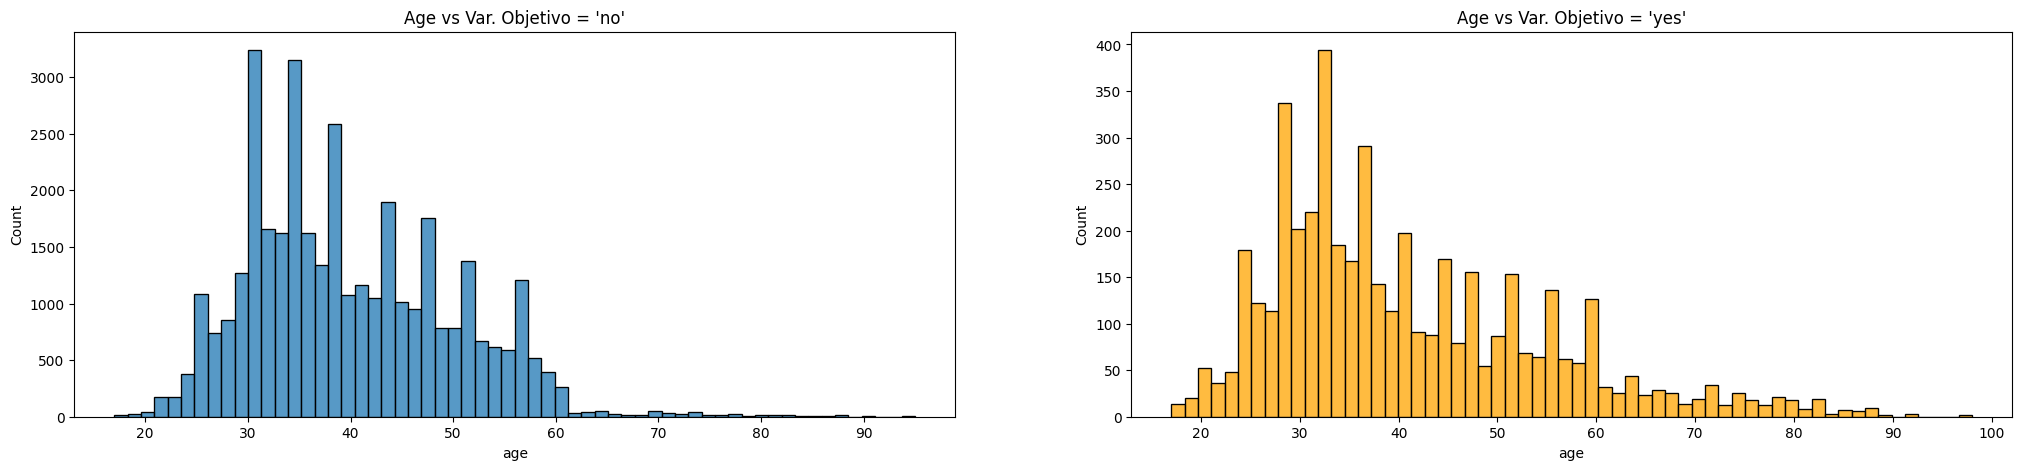

In [ ]:
fig, axes = plt.subplots (1,2, figsize = (25,5))
sns.histplot(data[data["y"] == "no"], x = "age", ax = axes[0], bins = 60)
sns.histplot(data[data["y"] == "yes"], x = "age", ax = axes[1], color = "orange", bins = 60)
axes[0].set_title("Age vs Var. Objetivo = 'no'")
axes[1].set_title("Age vs Var. Objetivo = 'yes'")


Text(0.5, 1.0, 'Age transformada con logaritmo')

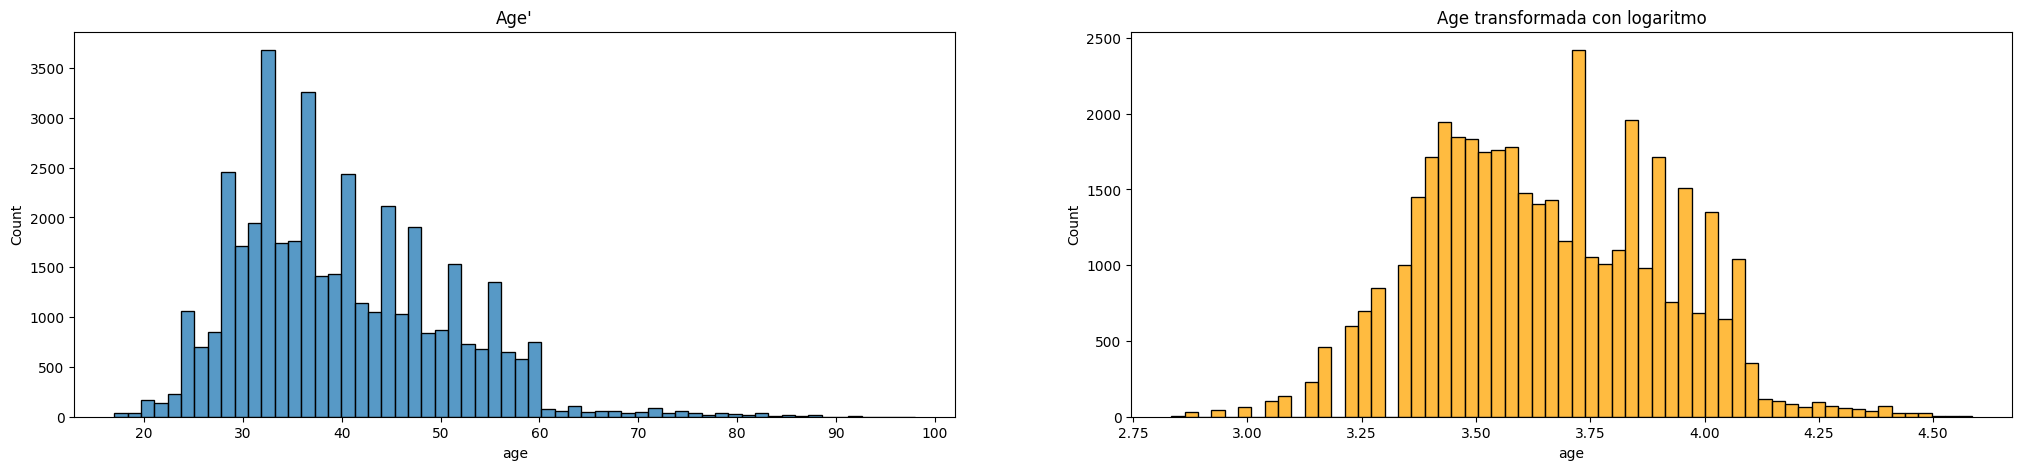

In [66]:
fig, axes = plt.subplots (1,2, figsize = (25,5))

age_log = np.log(data["age"])
sns.histplot(data, x = "age", ax = axes[0], bins = 60)
sns.histplot(age_log, ax = axes[1], color = "orange", bins = 60)
axes[0].set_title("Age'")
axes[1].set_title("Age transformada con logaritmo")

##### Test de Bondad de ajuste

In [24]:
import scipy.stats as stats

In [25]:
from scipy import stats
#No se puede usar Shapiro porque los datos son mayores a 5000
grupos = {
    "Total": data["age"],
    "Yes": data[data["y"] == "yes"]["age"],
    "No": data[data["y"] == "no"]["age"]
}


for nombre, datos in grupos.items():
    
    # Anderson-Darling Test
    anderson = stats.anderson(datos, dist='norm')
    estadistico_A = anderson.statistic
    valor_critico_5 = anderson.critical_values[2]  # índice 2 → 5%

    if estadistico_A < valor_critico_5:
        resultado_A = "✅ Anderson: No se rechaza H₀ (normal)"
    else:
        resultado_A = "❌ Anderson: Se rechaza H₀ (no normal)"

    # Kolmogorov-Smirnov Test
    mu, sigma = stats.norm.fit(datos)
    D, p_ks = stats.kstest(datos, 'norm', args=(mu, sigma))

    if p_ks > 0.05:
        resultado_KS = "✅ KS: No se rechaza H₀ (normal)"
    else:
        resultado_KS = "❌ KS: Se rechaza H₀ (no normal)"

    # Resultados combinados
    print(f"{nombre}:\n"
          f"  - Anderson-Darling → A = {estadistico_A:.4f}, crítico(5%) = {valor_critico_5:.4f} → {resultado_A}\n"
          f"  - Kolmogorov-Smirnov → D = {D:.4f}, p = {p_ks:.4f} → {resultado_KS}\n")



Total:
  - Anderson-Darling → A = 444.7290, crítico(5%) = 0.7870 → ❌ Anderson: Se rechaza H₀ (no normal)
  - Kolmogorov-Smirnov → D = 0.0944, p = 0.0000 → ❌ KS: Se rechaza H₀ (no normal)

Yes:
  - Anderson-Darling → A = 103.8369, crítico(5%) = 0.7860 → ❌ Anderson: Se rechaza H₀ (no normal)
  - Kolmogorov-Smirnov → D = 0.1271, p = 0.0000 → ❌ KS: Se rechaza H₀ (no normal)

No:
  - Anderson-Darling → A = 365.0346, crítico(5%) = 0.7870 → ❌ Anderson: Se rechaza H₀ (no normal)
  - Kolmogorov-Smirnov → D = 0.0928, p = 0.0000 → ❌ KS: Se rechaza H₀ (no normal)



#### Graficas qqplot para revisar normalidad

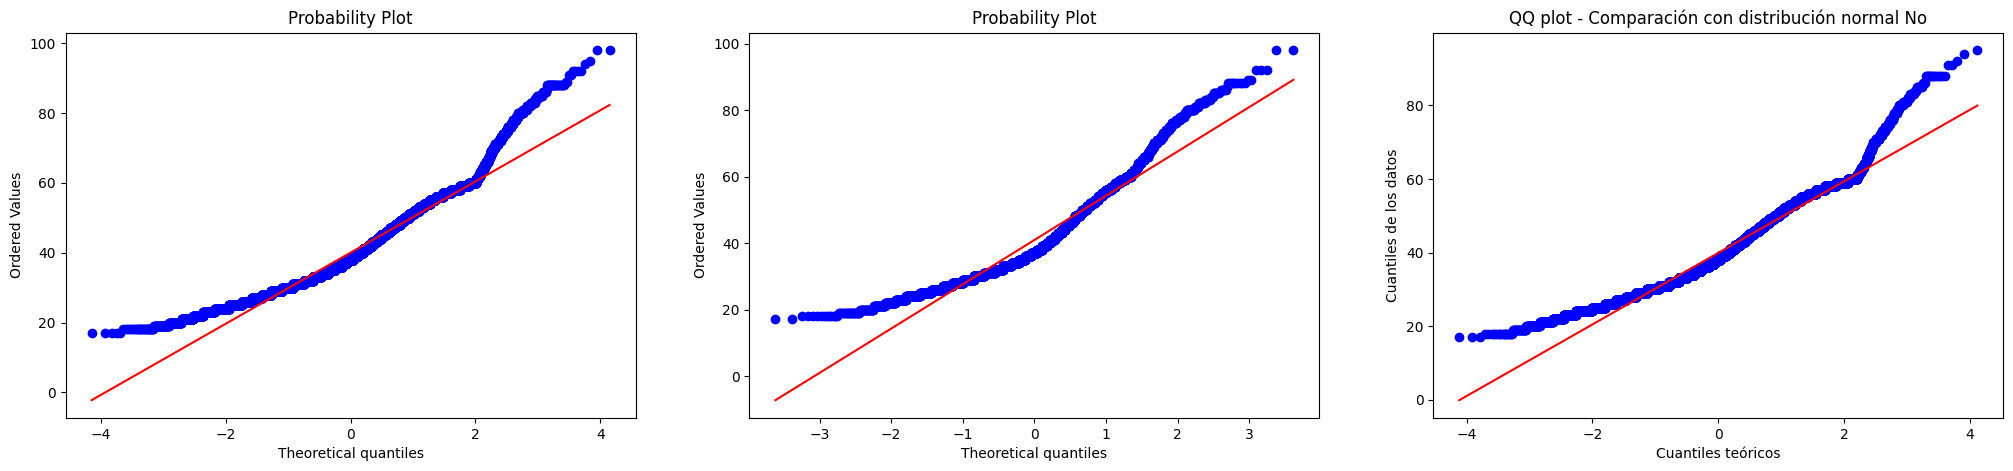

In [26]:
grupos = {
    "Total": data["age"],
    "Yes": data[data["y"] == "yes"]["age"],
    "No": data[data["y"] == "no"]["age"]
}
fig, axes = plt.subplots(1,3, figsize = (25,5))
i = 0
for nombre, datos in grupos.items():
    stats.probplot(datos, dist = "norm", plot =axes[i])
    plt.title(f"QQ plot - Comparación con distribución normal {nombre}")
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Cuantiles de los datos")
    i = i+1

#### Test para revisar con otras ditribuciones

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.012420,1184.843488,1210.362634,inf,0.048807,4.232840e-76
beta,0.012425,1219.621821,1253.647348,inf,0.051721,2.062513e-85
lognorm,0.012510,1157.758685,1183.277830,inf,0.048044,9.439258e-74
weibull_max,0.012606,1172.635172,1198.154317,inf,0.050230,1.405547e-80
weibull_min,0.013089,1324.973513,1350.492659,inf,0.066530,4.272428e-141


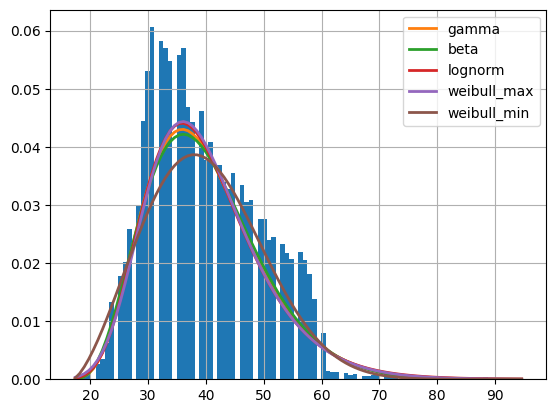

In [27]:
import warnings
from fitter import Fitter
# Evitar warnings de ajuste
warnings.filterwarnings("ignore")



# Instanciar el Fitter y ajustar
f = Fitter(datos,
           distributions=[
               'norm', 'lognorm', 'expon', 'gamma', 'beta', 'weibull_min',
               'weibull_max', 'pareto', 'triang', 'uniform'
           ])
f.fit()

# Mostrar resumen con mejores distribuciones
f.summary()

In [28]:
print("Mejor ajuste según SSE:")
print(f.get_best())

Mejor ajuste según SSE:
{'gamma': {'a': 6.156645820650962, 'loc': 15.170928389258728, 'scale': 4.018464053958596}}


In [29]:
print(f.df_errors.sort_values(by='sumsquare_error'))

             sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma               0.012420  1184.843488  1210.362634     inf      0.048807   
beta                0.012425  1219.621821  1253.647348     inf      0.051721   
lognorm             0.012510  1157.758685  1183.277830     inf      0.048044   
weibull_max         0.012606  1172.635172  1198.154317     inf      0.050230   
weibull_min         0.013089  1324.973513  1350.492659     inf      0.066530   
norm                0.014508  1427.918626  1444.931389     inf      0.092782   
triang              0.018759   937.140405   962.659551     inf      0.244246   
pareto              0.032977   972.770130   998.289275     inf      0.312494   
expon               0.032977   970.770113   987.782876     inf      0.312494   
uniform             0.033432   875.341765   892.354529     inf      0.443851   

                 ks_pvalue  
gamma         4.232840e-76  
beta          2.062513e-85  
lognorm       9.439258e-74  
wei

#### Comparacion con otras distribuciones usando Anderson-Darling

In [30]:

# Diccionario con grupos a evaluar
from scipy.stats import anderson
import pandas as pd

# Grupos a analizar
grupos = {
    "Total": data["age"],
    "Yes": data[data["y"] == "yes"]["age"],
    "No": data[data["y"] == "no"]["age"]
}

# Distribuciones válidas para scipy.stats.anderson
distribuciones = ['norm', 'expon', 'logistic', 'gumbel_l', 'gumbel_r']

# Lista donde almacenaremos los resultados
resultados = []

# Loop sobre cada grupo y cada distribución
for nombre_grupo, serie in grupos.items():
    datos = serie.dropna()  # quitar nulos

    for dist in distribuciones:
        # ⚠️ ESTA línea es la clave: SIN paréntesis extra
        res = anderson(datos, dist=dist)

        estadistico = res.statistic
        critico_5 = res.critical_values[2]  # índice 2 corresponde al nivel de significancia del 5%

        decision = "✅ No se rechaza H₀" if estadistico < critico_5 else "❌ Se rechaza H₀"

        resultados.append({
            "Grupo": nombre_grupo,
            "Distribución": dist,
            "Estadístico A": round(estadistico, 4),
            "Crítico 5%": round(critico_5, 4),
            "Resultado": decision
        })

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)

# Ordenar por grupo y estadístico
df_resultados = df_resultados.sort_values(by=["Grupo", "Estadístico A"])

# Mostrar como tabla legible
print(df_resultados.to_string(index=False))

Grupo Distribución  Estadístico A  Crítico 5%       Resultado
   No     gumbel_r       113.5578       0.756 ❌ Se rechaza H₀
   No         norm       365.0346       0.787 ❌ Se rechaza H₀
   No     logistic       371.1319       0.660 ❌ Se rechaza H₀
   No     gumbel_l      1184.3319       0.756 ❌ Se rechaza H₀
   No        expon      9708.6334       1.341 ❌ Se rechaza H₀
Total     gumbel_r       110.3611       0.756 ❌ Se rechaza H₀
Total     logistic       424.4985       0.660 ❌ Se rechaza H₀
Total         norm       444.7290       0.787 ❌ Se rechaza H₀
Total     gumbel_l      1571.5986       0.756 ❌ Se rechaza H₀
Total        expon     10686.0749       1.341 ❌ Se rechaza H₀
  Yes     gumbel_r        25.8062       0.755 ❌ Se rechaza H₀
  Yes     logistic        82.8177       0.660 ❌ Se rechaza H₀
  Yes         norm       103.8369       0.786 ❌ Se rechaza H₀
  Yes     gumbel_l       240.0514       0.755 ❌ Se rechaza H₀
  Yes        expon      1004.7365       1.341 ❌ Se rechaza H₀


### Pregunta 5

<Axes: xlabel='y', ylabel='duration'>

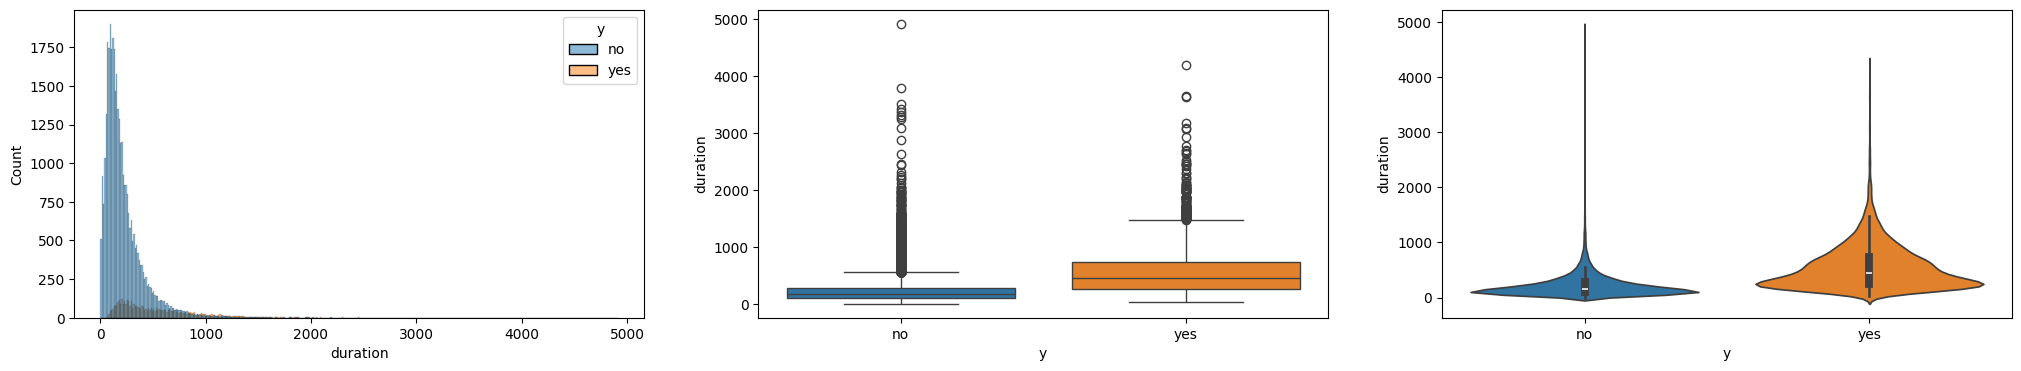

In [68]:
fig , axes = plt.subplots(1,3, figsize = (25,4))
sns.histplot(data, x = "duration", hue = "y", ax = axes[0])
sns.boxplot(data, x = "y", y = "duration", hue = "y", ax = axes[1])
sns.violinplot(data, x = "y", y = "duration", hue = "y")

Text(0.5, 1.0, "duration vs Var. Objetivo = 'yes'")

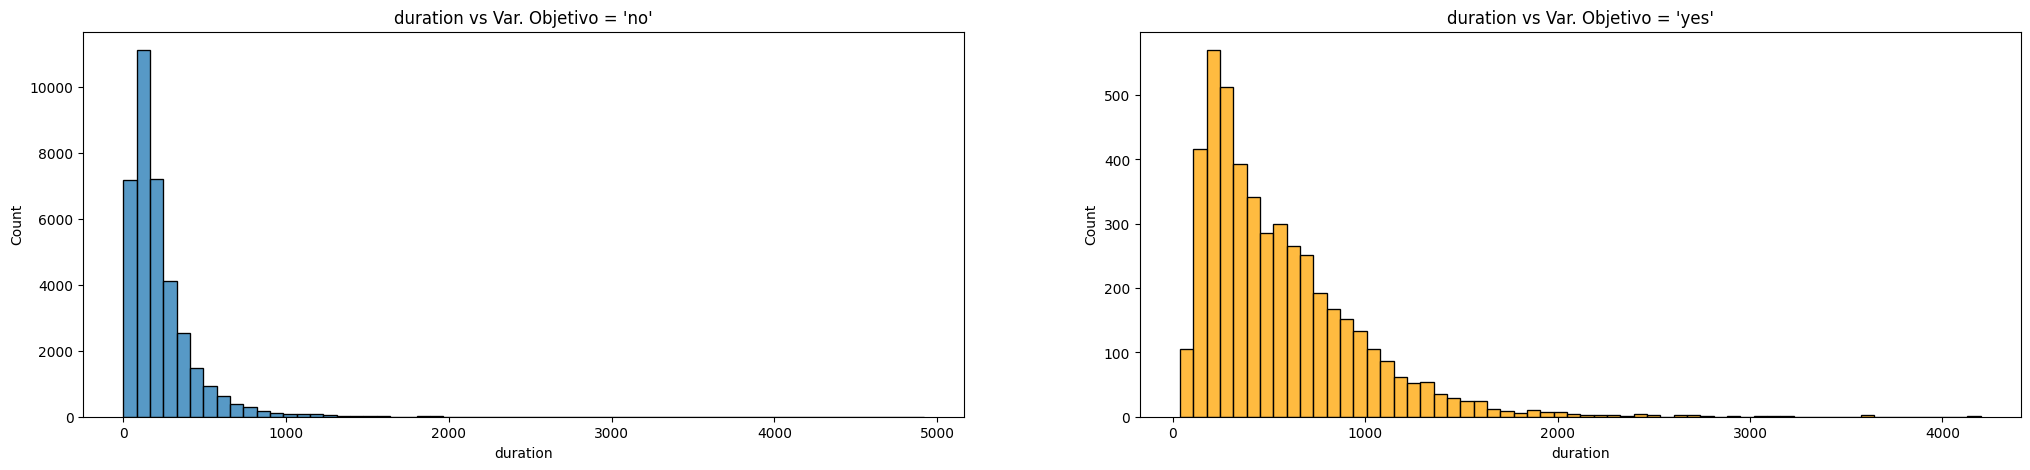

In [67]:
fig, axes = plt.subplots (1,2, figsize = (25,5))
sns.histplot(data[data["y"] == "no"], x = "duration", ax = axes[0], bins = 60)
sns.histplot(data[data["y"] == "yes"], x = "duration", ax = axes[1], color = "orange", bins = 60)
axes[0].set_title("duration vs Var. Objetivo = 'no'")
axes[1].set_title("duration vs Var. Objetivo = 'yes'")

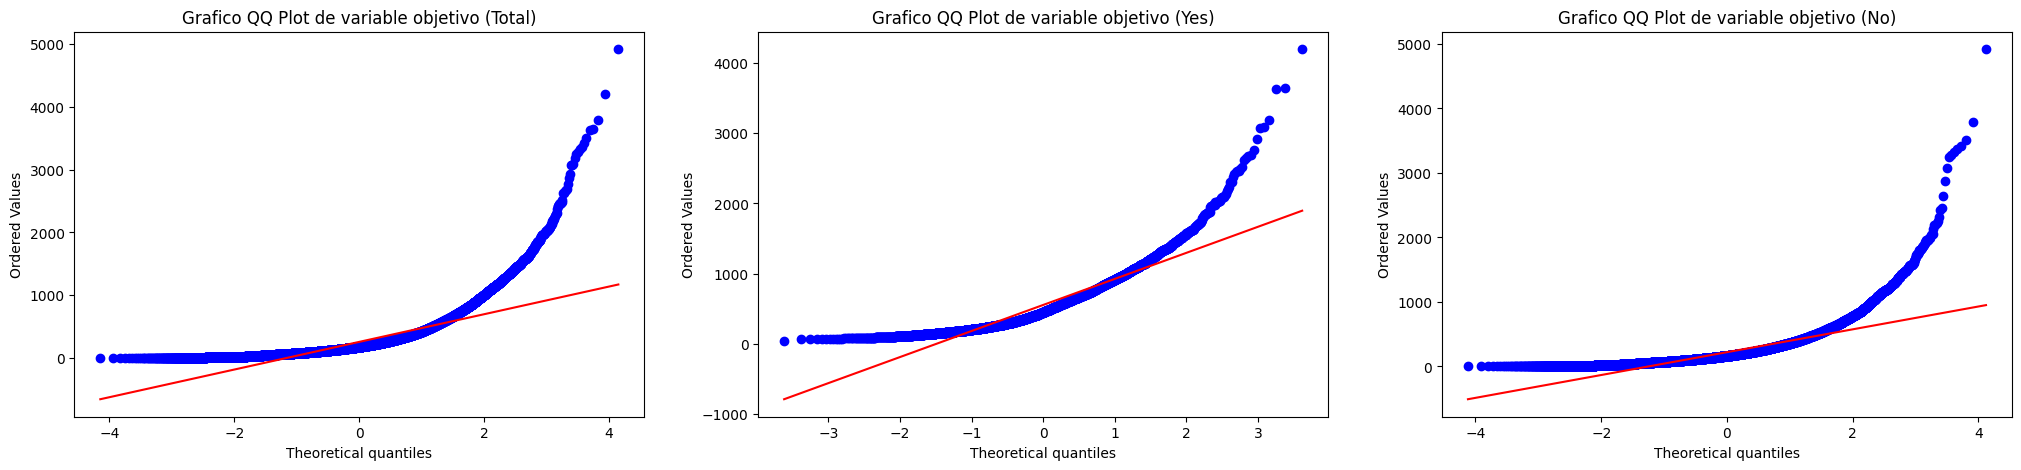

In [47]:
fig, axes = plt.subplots(1,3, figsize = (25,5))

grupos = {
    "Total": data["duration"],
    "Yes": data[data["y"] == "yes"]["duration"],
    "No": data[data["y"] == "no"]["duration"]
}
i=0
for nombre, datos in grupos.items():
    stats.probplot(datos, dist = "norm", plot = axes[i])
    axes[i].set_title(f"Grafico QQ Plot de variable objetivo ({nombre})")
    i=i+1

2770.4509413149135
[0.576 0.656 0.787 0.918 1.092]
nan


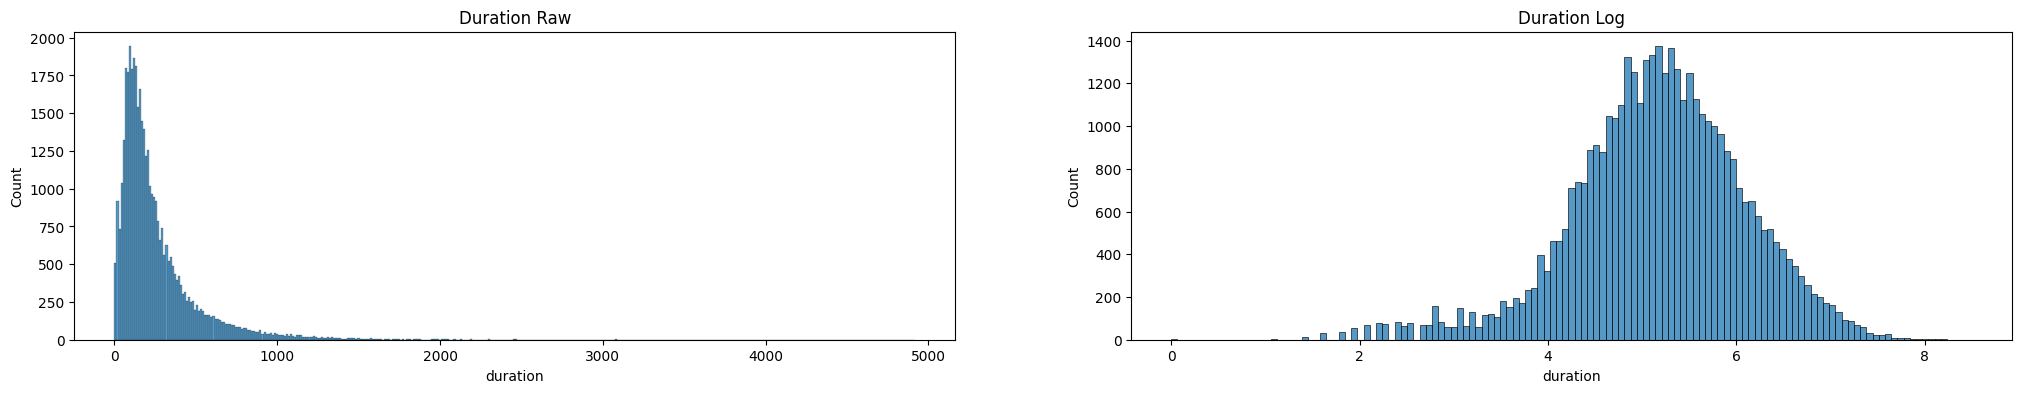

In [ ]:
from scipy.stats import anderson
fig , axes = plt.subplots(1,2, figsize = (25,4))


prueba_anderson = anderson(data["duration"], dist = "norm")
print(prueba_anderson.statistic) #2770.4509413149135
print(prueba_anderson.critical_values)#[0.576 0.656 0.787 0.918 1.092]


log_duration = np.log(data["duration"])
sns.histplot(data["duration"], ax = axes[0])
axes[0].set_title("Duration Raw")
sns.histplot(log_duration, ax = axes[1])
axes[1].set_title("Duration Log")

prueba_anderson_log = anderson(log_duration, dist = "norm")
print(prueba_anderson_log.statistic)



In [64]:
log_duration.describe()

count    4.118800e+04
mean             -inf
std               NaN
min              -inf
25%      4.624973e+00
50%      5.192957e+00
75%      5.765191e+00
max      8.500657e+00
Name: duration, dtype: float64

### Pregunta 6

<Axes: xlabel='marital', ylabel='age'>

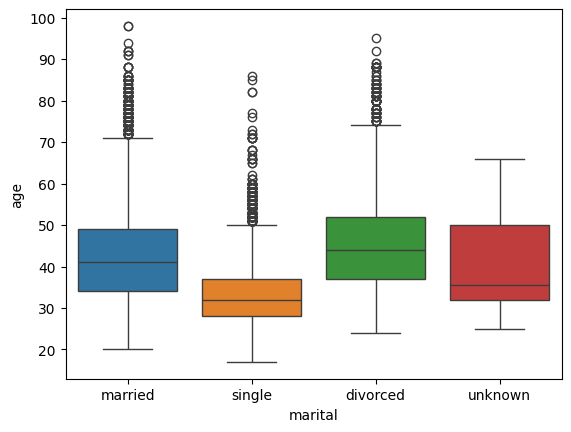

In [70]:
sns.boxplot(data, x= "marital", y ="age", hue = "marital")

### Pregunta 7

<Axes: xlabel='y', ylabel='duration'>

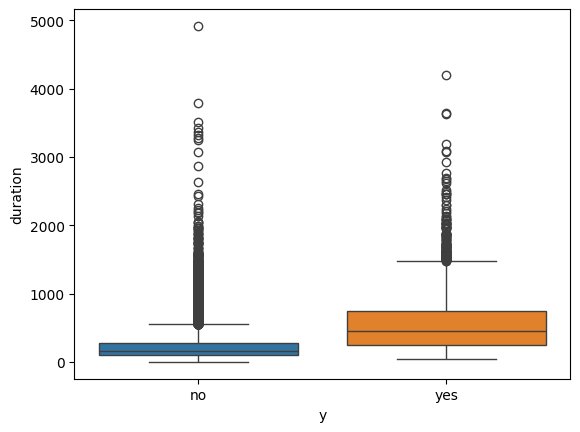

In [74]:
sns.boxplot(data, x = "y", y ="duration", hue = "y")

Text(0.5, 1.0, "duration vs Var. Objetivo = 'yes'")

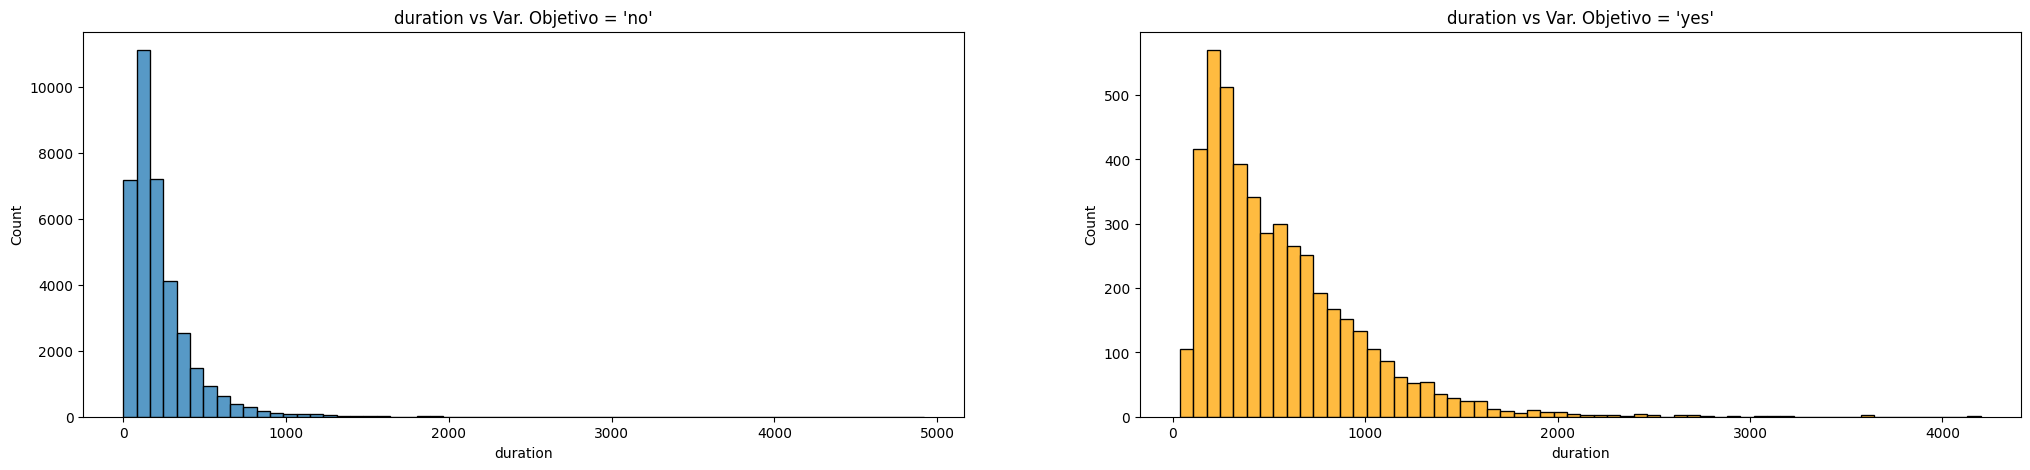

In [71]:
fig, axes = plt.subplots (1,2, figsize = (25,5))
sns.histplot(data[data["y"] == "no"], x = "duration", ax = axes[0], bins = 60)
sns.histplot(data[data["y"] == "yes"], x = "duration", ax = axes[1], color = "orange", bins = 60)
axes[0].set_title("duration vs Var. Objetivo = 'no'")
axes[1].set_title("duration vs Var. Objetivo = 'yes'")

### Pregunta 8

¿Qué relación existe entre la edad del cliente (age) y la duración de la llamada
(duration), y cómo se distribuyen estos patrones cuando se clasifican según si
el cliente finalmente suscribió un depósito a plazo (y)?


<Axes: xlabel='age', ylabel='duration'>

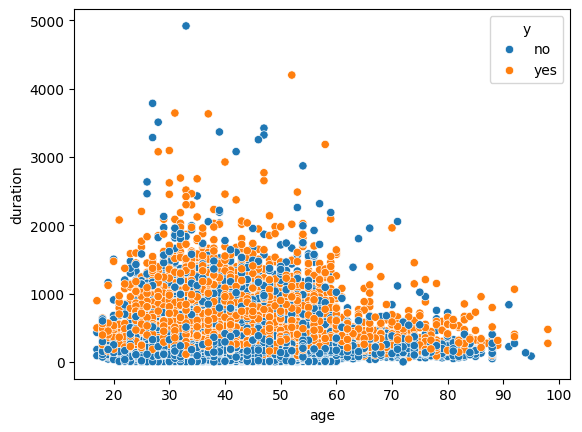

In [81]:
sns.scatterplot(data, x = "age", y ="duration", hue = "y")

<Axes: xlabel='age', ylabel='duration'>

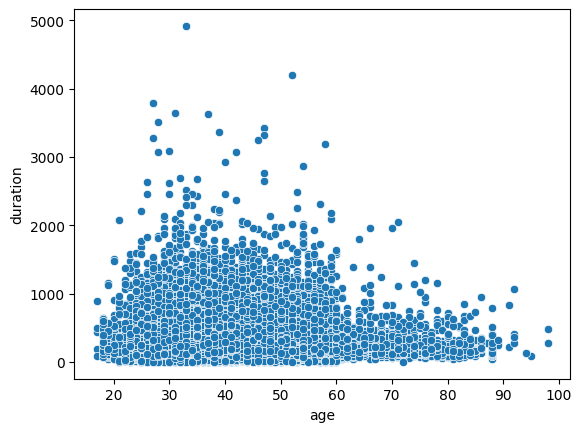

In [82]:
sns.scatterplot(data, x ="age", y ="duration")

### Pregunta 9 

<Axes: >

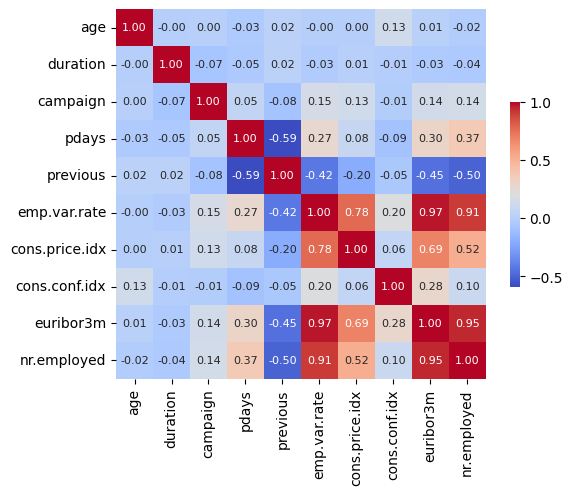

In [95]:
corr_matriz = data[var_quantitative].corr(method="pearson")
sns.heatmap(corr_matriz,
            annot =True, #valor de matriz,
            fmt=".2f",
            cmap="coolwarm",
            square = True,
            cbar_kws={"shrink": 0.5},
            annot_kws={"size": 8}
            )

In [99]:
corr_long = corr_matriz.where(np.triu(np.ones(corr_matriz.shape), k=1).astype(bool))
corr_long = corr_long.stack().reset_index()
corr_long.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Ordenar por valor absoluto de la correlación (de mayor a menor)
corr_ordenadas = corr_long.reindex(corr_long['Correlación'].abs().sort_values(ascending=False).index)

# Mostrar top 5 correlaciones
print(corr_ordenadas.head(5))

        Variable 1      Variable 2  Correlación
37    emp.var.rate       euribor3m     0.972245
44       euribor3m     nr.employed     0.945154
38    emp.var.rate     nr.employed     0.906970
35    emp.var.rate  cons.price.idx     0.775334
40  cons.price.idx       euribor3m     0.688230
